In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
label_df=pd.read_csv('labels.csv')
label_df.head()

,id,count
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [3]:
label_df.columns=['id','People']

In [4]:
label_df.head()

,id,People
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [5]:
img=np.load('images.npy')

In [6]:
img.shape

(2000, 480, 640, 3)

In [7]:
labels=np.array(label_df['People'])

In [8]:
labels

array([35, 41, 41, ..., 25, 26, 26], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(x_train.shape[0])
print(x_test.shape[0])

1800
200


In [10]:
## Model Creation:
#image shape:-----(480,640,3)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(480,640,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
])



In [11]:
model.compile(loss=tf.keras.losses.Huber(),optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 128)    0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 118, 158, 128)     0         
                                                                 
 flatten (Flatten)           (None, 2386432)           0

In [12]:
# lr_monitor = tf.keras.callbacks.LearningRateScheduler(
#                 lambda epochs : 1e-8 * 10 ** (epochs/20))

In [13]:
## Early-stopping:
# early_stopping=tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.001,
#     patience=20,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0,
# )
## Not needed for now:-

In [15]:
loaded_model=tf.keras.models.load_model('crowd_model.h5')

In [16]:
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf

In [17]:
predictions = loaded_model.predict(np.array(img))

63/63 [==============================] - 726s 11s/step


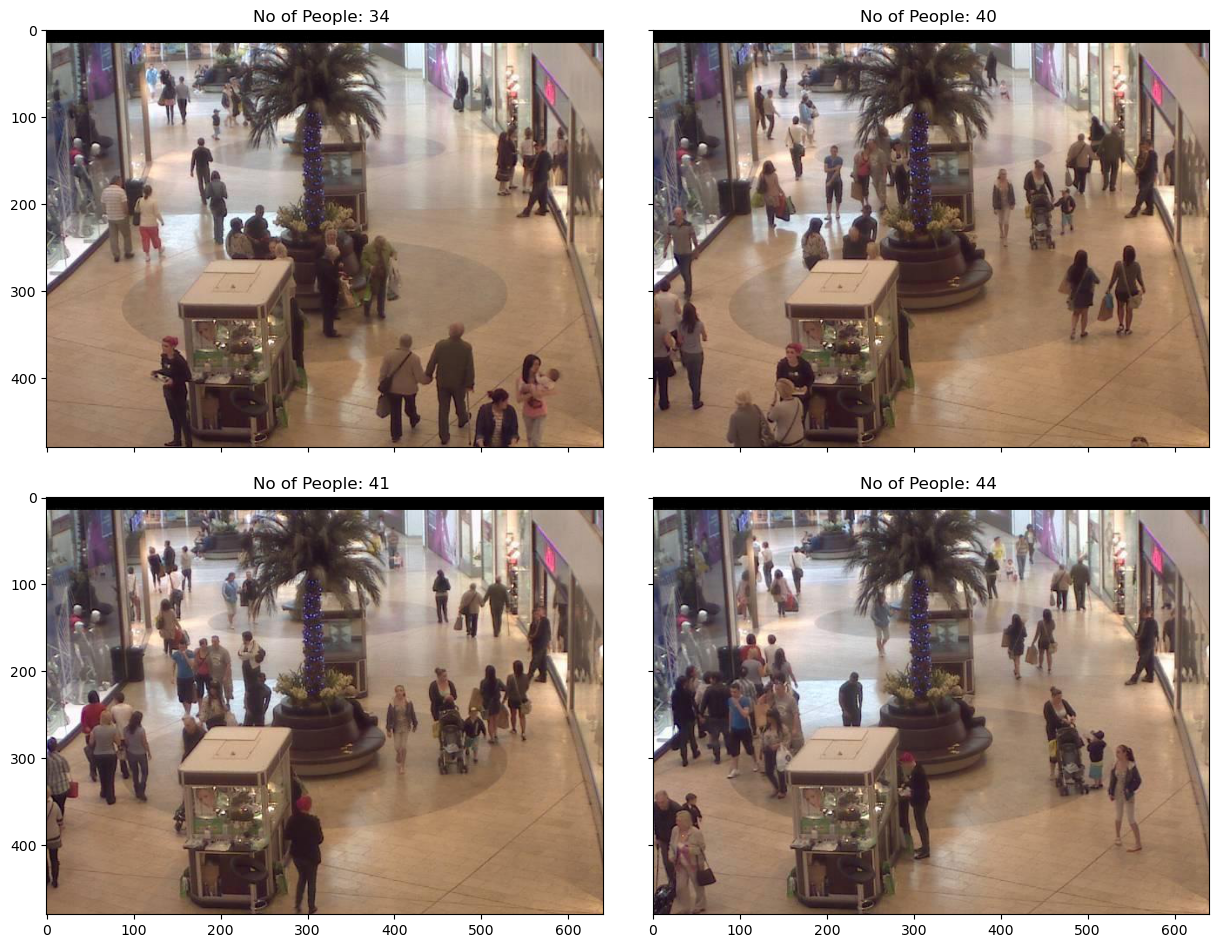

In [54]:
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(
    fig, 111,
    nrows_ncols=(2, 2),
    axes_pad=0.5
)

for x in range(0, 4):
    grid[x].set_title('No of People: {} '.format(int(predictions[x][0]), labels[x]))
    grid[x].imshow(img[x])


In [29]:
from PIL import Image

In [32]:
# image = Image.open('shopping-mall-in-indian-city-of-bhubaneswar-2BC3JJ5.jpg')
# new_predictions=loaded_model.predict(np.array)

In [51]:
img_path = 'n1.jpg'
image = Image.open(img_path)
image = image.resize((640, 480))  # Resize the image to match the model's input size
image_array = np.array(image)
image_array = image_array / 255.0 

In [85]:
prediction = loaded_model.predict(np.expand_dims(image_array, axis=0))

1/1 [==============================] - 3s 3s/step


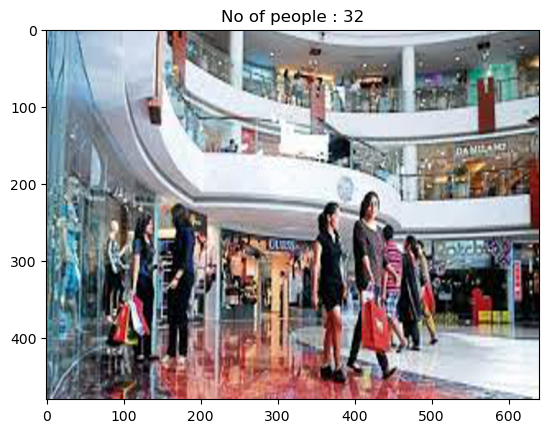

In [86]:
# fig = plt.figure(figsize=(15, 15))
# grid = ImageGrid(
#     fig, 111,
#     nrows_ncols=(2, 2),
#     axes_pad=0.5
# )

# for x in range(0, 1):
#     grid[x].set_title('No of People: {} '.format(int(prediction[x][0]), labels[x]))
#     grid[x].imshow(image_array[x])

    
# plt.show()


plt.imshow(image_array)
plt.title('No of people : {}'.format(int(prediction[0][0]*100)))
plt.show()


In [79]:
img_path = 'images.jpg'
image = Image.open(img_path)
image = image.resize((640, 480))  # Resize the image to match the model's input size
mall_image = np.array(image)
mall_image_array = image_array / 255.0 

In [80]:
prediction = loaded_model.predict(np.expand_dims(mall_image, axis=0))

1/1 [==============================] - 0s 194ms/step


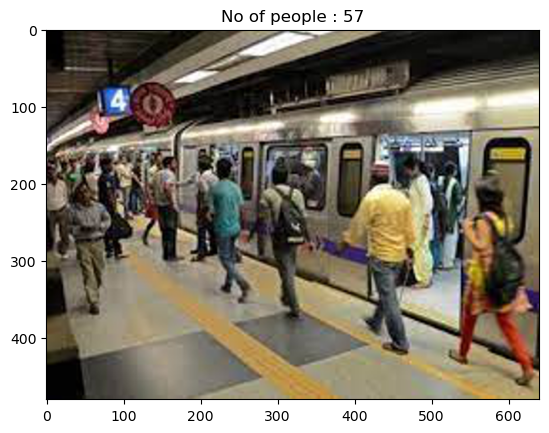

In [81]:
plt.imshow(mall_image)
plt.title('No of people : {}'.format(int(prediction[0][0])))
plt.show()